In [3]:
import pandas as pd

from vehicle_drivecalcs import get_instantaneous_drivetrain_efficiency

## Key Concepts
**Torque**: A measure of force that can cause an object to rotate about an axis. In the context of engines, torque is the rotating force produced by an engine's crankshaft. Example of crankshaft from spark-ignited engine below; fuel and air are injected in the piston, while a spark plug initiates a spark while the piston is toward the top of the chamber. The spark combusts the fuel/air, generating pressure to move the piston in order to rotate the crankshaft.

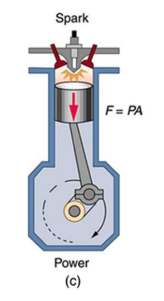

The more rotating force on an engine's crankshaft, the greater its _ability_ to do work. The amount of **horsepower** of an engine is the amount of work is accomplished in a given period of time (One horsepower is the power required to lift 33,000 pounds one foot in one minute)

# Engine Technology Question

This question relies on figures from the paper by J.P. Szybist _et al._ entitled "What fuel properties enable higher thermal efficiency in spark-ignited engines?", _Progress in Energy and Combustion Science_ **82**, 100876 (2021).

**a)** Consider **Figure 7** in the paper which plots engine brake thermal efficiency for three different engines. The plots suggest that engine efficiency for the two most recent engines from Honda and Toyota primarily depend on engine torque $ T_{eng} $. Make a fit of engine efficiency $ \eta_{eng} $ for the Honda and Toyota engines as a function of $ T_{eng} $ following a form similar to the one for vehicle power demand $ W_{veh} $ in HW #2 Question 2. The fit will involve three parameters, $ \eta_{eng,0} $, $ T_1 $, $ T_2 $ of the formula in the following form:

$ \eta_{eng} = \eta_{eng,0} \Bigg[ \exp \Bigg(- \frac {T_{eng}} {T_{1}}\Bigg) - \exp \Bigg(- \frac {T_{eng}} {T_{2}}\Bigg)\Bigg] $


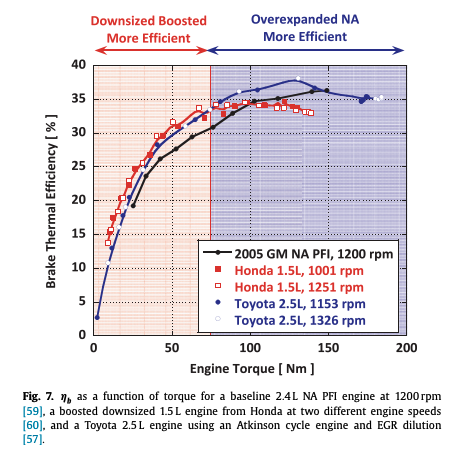

Write one short paragraph (< 150 words) on the technologies discussed in the paper that either Honda or Toyota have used to improve $ \eta_{eng} $ over previous generation technology.
 

In [67]:
ETA_ENGINE_CONSTANT_KEY = "eta_engine"
TORQUE_EFFICIENCY_CONSTANT_1_KEY = "torque_one"
TORQUE_EFFICIENCY_CONSTANT_2_KEY = "torque_two"
TORQUE_COLUMN_NAME = "torque_nm"
HONDA_EFFICIENCY_COLUMN_NAME = "honda_eta_engine"
TOYOTA_EFFICIENCY_COLUMN_NAME = "toyota_eta_engine"

MAX_TORQUE = 250 # newton-meters

honda_engine_config = {
    ETA_ENGINE_CONSTANT_KEY: .4,
    TORQUE_EFFICIENCY_CONSTANT_1_KEY: 10000.,
    TORQUE_EFFICIENCY_CONSTANT_2_KEY: 75.
}

toyota_engine_config = {
    ETA_ENGINE_CONSTANT_KEY: .35,
    TORQUE_EFFICIENCY_CONSTANT_1_KEY: 10000,
    TORQUE_EFFICIENCY_CONSTANT_2_KEY: 75.
}

In [68]:
torque_column_values = [newton_meter for newton_meter in range(0, MAX_TORQUE + 1)]
torque_df = pd.DataFrame()
torque_df[TORQUE_COLUMN_NAME] = torque_column_values
torque_df[HONDA_EFFICIENCY_COLUMN_NAME] = torque_df.apply(
    lambda x: get_instantaneous_drivetrain_efficiency(
        alpha=honda_engine_config[ETA_ENGINE_CONSTANT_KEY],
        work_vehicle= x[TORQUE_COLUMN_NAME],
        w_1=honda_engine_config[TORQUE_EFFICIENCY_CONSTANT_1_KEY],
        w_2=honda_engine_config[TORQUE_EFFICIENCY_CONSTANT_2_KEY]
    ),
    axis = 1
)

torque_df[TOYOTA_EFFICIENCY_COLUMN_NAME] = torque_df.apply(
    lambda x: get_instantaneous_drivetrain_efficiency(
        alpha=toyota_engine_config[ETA_ENGINE_CONSTANT_KEY],
        work_vehicle= x[TORQUE_COLUMN_NAME],
        w_1=toyota_engine_config[TORQUE_EFFICIENCY_CONSTANT_1_KEY],
        w_2=toyota_engine_config[TORQUE_EFFICIENCY_CONSTANT_2_KEY]
    ),
    axis = 1
)

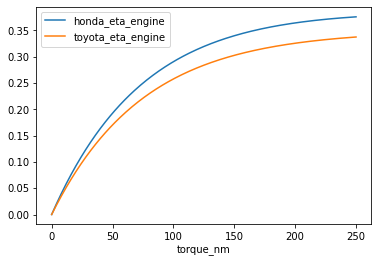

In [66]:
line_plot = torque_df.plot.line(x=TORQUE_COLUMN_NAME)

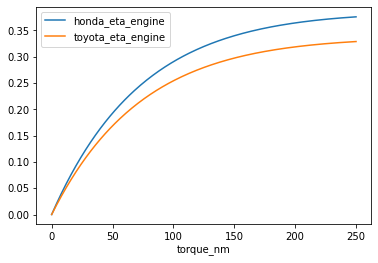

# Battery Technology Question

Battery technology used by Tesla 4-5 years ago utilitized UR18650RX power cell technology by Panasonic, whose test performance is plotted in Figure 1 below. We will attempt to model this cell performance by a simple battery voltage model in equation 3 as discussed in G. Saldana, J. I. S. Martin, I. Zamora, F. J. Asensio, O. Onederra, "Analysis of the Current Electric Battery Models for Electric Vehicle Simulation. _Energies_ **12** (2019).

$ V_{batt} = V_{OC}(SOC) - I_{batt}R_{int} $

$ V_{batt} $ is the operating voltage of the battery cell, $ V_{OC}(SOC) $ is the 0 A voltage of the battery of a function of state-of-charge, SOC, and the battery current $ I_{batt} $ is positive for discharging and negative for charging. Each cell is rated to a capacity of $ 2000 mAh = 2 Ah $ with an internal resistance per cell, $ R_{int} $ at 20 degrees C that can be fit to the data in Figure 1. A discharge rate of 1.0 C means a current of 2.0 A per cell. The early Tesla car battery pack uses 7104 of these cells.

**Figure 1**
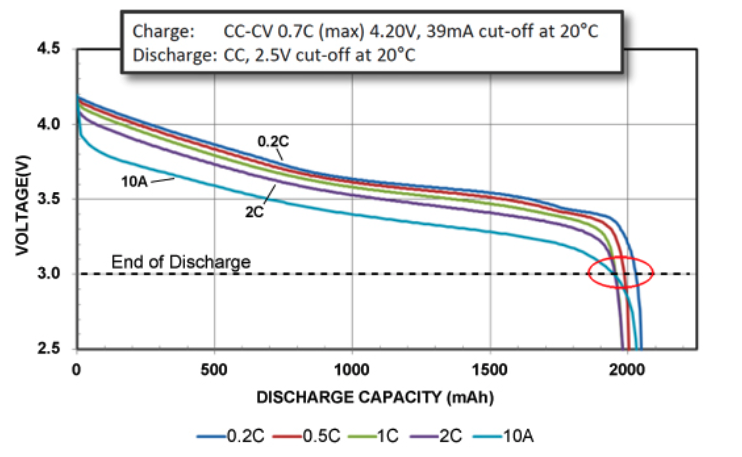


## Key Concepts
**Voltage**: The pressure from an electrical circuit's power source that pushes charged electrons (i.e., current) through a conductor, enabling those electrons to do work. Without voltage, also known as the potential difference, electrons will move in random directions, and we want those electrons to move in the same direction (i.e., current) in order for those electrons to power electronics

Helpful [YouTube video here](https://www.youtube.com/watch?v=w82aSjLuD_8). Analogy using a water tank - the more a tank is filled the more pressure produced in the pipes that flow from the tank. Voltage is similar to pressure in this case.

**Current**: The flow of electrons in a circuit. To produce electricity, we need the electrons to flow in the same direction around a circuit. As electrons will flow in random direction if left on their own, we need voltage to produce current.

In a battery, the electrons are stored in the cathode, and released from the cathode via an electrolyzer. The electrons are attractive to the material that comprises the anode, and so once separated from the cathode, move into the anode thus creating voltage which is able to power electronics.

The amount of voltage a battery is able to produce depends on how charge the battery is (think of the water tank example again)

**Resistance**: Resistance of a circuit restricts the flow of current through the component. Copper has low resistance, while rubber has very high resistances. This is why electrical wires tend to be copper inside of rubber; the high resistance of the rubber restricts the electrons from being conducted through it, making it safer.

**a)** Plot energy capacity (in kWh) of the battery pack as a function of discharge rates from 0.2C to 5.0C based on estimated mean $ V_{cell} $ and mac mAh at 20 degree C. Describe your calculations.

In [3]:
import os
import pandas as pd

DATA_DIR_BASE = os.path.join(
    os.path.dirname(os.path.realpath("__file__")),
    "data",
    "hw3"
)

RAW_DATA_DIR = os.path.join(
    DATA_DIR_BASE,
    "raw"
)

INTERIM_DATA_DIR = os.path.join(
    DATA_DIR_BASE,
    "interim"
)


In [18]:
battery_data_4tenthsA_df = pd.read_csv(os.path.join(RAW_DATA_DIR, "HW3 - Problem 2 - 0.2C.csv"))
battery_data_4tenthsA_df.columns = ["mAh_0.4A", "V_0.4A"]

battery_data_1A_df = pd.read_csv(os.path.join(RAW_DATA_DIR, "HW3 - Problem 2 - 0.5C.csv"))
battery_data_1A_df.columns = ["mAh_1A", "V_1A"]
battery_data_1A_df = battery_data_1A_df.sort_values("mAh_1A")

battery_data_2A_df = pd.read_csv(os.path.join(RAW_DATA_DIR, "HW3 - Problem 2 - 1C.csv"))
battery_data_2A_df.columns = ["mAh_2A", "V_2A"]
battery_data_2A_df = battery_data_2A_df.sort_values("mAh_2A")

battery_data_4A_df = pd.read_csv(os.path.join(RAW_DATA_DIR, "HW3 - Problem 2 - 2C.csv"))
battery_data_4A_df.columns = ["mAh_4A", "V_4A"]
battery_data_4A_df = battery_data_4A_df.sort_values("mAh_4A")

battery_data_10A_df = pd.read_csv(os.path.join(RAW_DATA_DIR, "HW3 - Problem 2 - 5C.csv"))
battery_data_10A_df.columns = ["mAh_10A", "V_10A"]
battery_data_10A_df = battery_data_10A_df.sort_values("mAh_10A")

full_battery_df = pd.concat([
    battery_data_4tenthsA_df, 
    battery_data_1A_df,
    battery_data_2A_df,
    battery_data_4A_df,
    battery_data_10A_df
], axis =1)

In [ ]:
full_battery_df

#### Find $ R_{int} $

Average difference between the curves in Figure 1 from 0.2C and 2C. According to Ohm's Law, $ V = I * R $, or alternatively $ R = V / I $. Since we have $ V $ and $ I $ for the 0.2C (0.4A) and 2C (4A) curves, we can average out the resistances for each of the curves.

In [25]:
#full_battery_df[["mAh_0.4A", "V_0.4A", "mAh_4A", "V_4A"]]

battery_data_4tenthsA_df["R_0.4A"] = battery_data_4tenthsA_df["V_0.4A"] * 0.4

battery_data_4tenthsA_df

,mAh_0.4A,V_0.4A,R_0.4A
0,24.251056,4.237894,1.695158
1,78.781165,4.207667,1.683067
2,131.321124,4.169961,1.667985
3,183.861083,4.133937,1.653575
4,236.401042,4.099175,1.639670
5,288.941000,4.066514,1.626606
6,341.480959,4.032592,1.613037
7,394.020918,4.000772,1.600309
8,446.560877,3.970633,1.588253
9,499.100836,3.940495,1.576198


In [26]:
battery_data_4A_df["R_4A"] = battery_data_4A_df["V_4A"] * 4

battery_data_4A_df

,mAh_4A,V_4A,R_4A
40,10.243278,4.166141,16.664564
0,40.570286,4.113718,16.454874
1,93.110245,4.061824,16.247297
2,144.456114,4.023800,16.095202
3,202.435816,3.981939,15.927757
4,254.312391,3.946614,15.786457
5,312.822800,3.909251,15.637002
6,368.092107,3.876209,15.504838
7,421.617664,3.844779,15.379116
8,483.577666,3.810763,15.243054
